In [1]:
# upload all import packages
# subjects' info: age, gender, ...summary all the information you can show. image info: size, how many, intensity histogram, ...
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob
import pydicom
from pydicom.data import get_testdata_files
import os

## PLOT density function individually

#### image and density plot 1

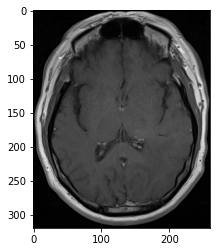

In [2]:
ds = pydicom.dcmread('../input/brain-tumor-progression/Brain-Tumor-Progression/PGBM-001/04-02-1992-FH-HEADBrain Protocols-79896/11.000000-T1post-80644/1-13.dcm')
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.savefig('tumor_plot1.png')
# plt.show()

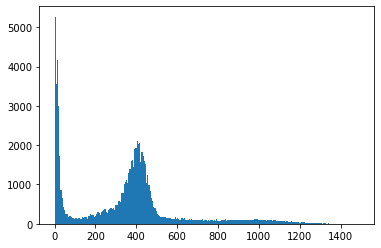

In [3]:
ds1 = pydicom.dcmread('../input/brain-tumor-progression/Brain-Tumor-Progression/PGBM-001/04-02-1992-FH-HEADBrain Protocols-79896/11.000000-T1post-80644/1-13.dcm')
ax = plt.hist(ds1.pixel_array.ravel(), bins = 256)
# plt.show()
plt.savefig('first_plot1.png', transparent = True)

#### image and density plot 2

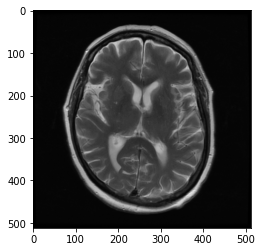

In [4]:
ds = pydicom.dcmread('../input/brain-tumor-progression/Brain-Tumor-Progression/PGBM-007/12-29-1992-Mr Rcbv Sequence Fh-74352/37998.000000-T2reg-77099/1-12.dcm')
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.savefig('tumor_plot2.png')
# plt.show()

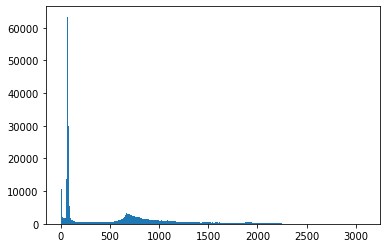

In [5]:
ds2 = pydicom.dcmread('../input/brain-tumor-progression/Brain-Tumor-Progression/PGBM-007/12-29-1992-Mr Rcbv Sequence Fh-74352/37998.000000-T2reg-77099/1-12.dcm')
ax = plt.hist(ds2.pixel_array.ravel(), bins = 256)
# plt.show()
plt.savefig('first_plot2.png')

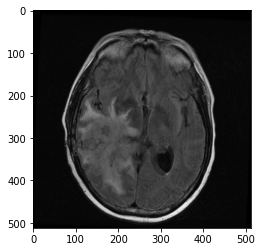

In [6]:
ds = pydicom.dcmread('../input/brain-tumor-progression/Brain-Tumor-Progression/PGBM-017/08-21-1997-MR RCBV SEQUENCE-73885/37603.000000-FLAIRreg-59258/1-12.dcm')
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.savefig('tumor_plot3.png')
# plt.show()

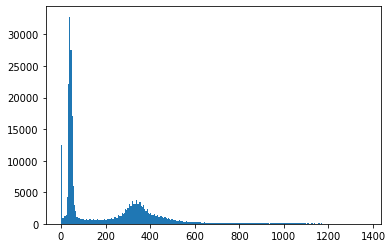

In [7]:

ds3 = pydicom.dcmread('../input/brain-tumor-progression/Brain-Tumor-Progression/PGBM-017/08-21-1997-MR RCBV SEQUENCE-73885/37603.000000-FLAIRreg-59258/1-12.dcm')
ax = plt.hist(ds3.pixel_array.ravel(), bins = 256)
# plt.show()
plt.savefig('first_plot3.png')

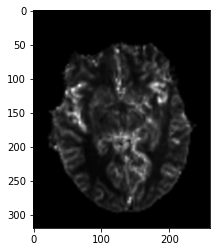

In [8]:
ds = pydicom.dcmread('../input/brain-tumor-progression/Brain-Tumor-Progression/PGBM-020/11-09-1989-HEADBrain Protocols-61674/28721.000000-nCBFreg-99726/1-12.dcm')
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.savefig('tumor_plot4.png')
# plt.show()

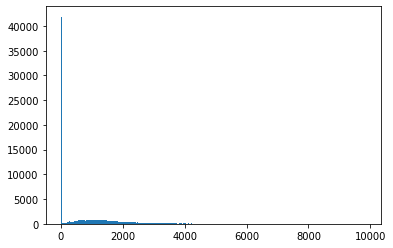

In [9]:
ds4 = pydicom.dcmread('../input/brain-tumor-progression/Brain-Tumor-Progression/PGBM-020/11-09-1989-HEADBrain Protocols-61674/28721.000000-nCBFreg-99726/1-12.dcm')
ax = plt.hist(ds4.pixel_array.ravel(), bins = 256)
# plt.show()
plt.savefig('first_plot4.png')

In [10]:
# ds4
# plt.imshow(ds4.pixel_array, cmap=plt.cm.gray)
# plt.show()

## Reading Dataset

In [11]:
# read all the file
df = []
pixels= []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        dataset = pydicom.dcmread(os.path.join(dirname, filename))
        df.append(dataset)
        pixels.append(dataset.pixel_array)

In [12]:
# dfnames =[]
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         ds = pydicom.read_file(os.path.join(dirname, filename), force = True)
#         df = pd.DataFrame(ds.values())
# #        able to read raw data elements
#         df[0] = df[0].apply(lambda x: pydicom.dataelem.DataElement_from_raw(x) if isinstance(x, pydicom.dataelem.RawDataElement) else x)
#         df['name'] = df[0].apply(lambda x: x.name)
# #         df['value'] = df[0].apply(lambda x: x.value)
#         dfnames.append(df[0].apply(lambda x: x.name))
#         df = df[['name']]

### find max length list in dicoms

In [13]:
biggest = 0
# length of 8798
for i in range (len(df)):
#     i is the 8798 df[i]
    for j in range (len(df[i])):
        if j >biggest:
            biggest = j
    
#     compute length of df 
print(biggest)

270


### locate the list

In [14]:
location = []
# length of 8798
for i in range (len(df)):
#     i is the 8798 df[i]
    location.append(len(df[i]))
location.index(max(location))

490

In [15]:
df[490]

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.4429.7055.221302824824595206355471223210
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.4429.7055.221302824824595206355471223210
(0008, 0020) Study Date       

In [16]:
# df[0].apply(lambda x: pydicom.dataelem.DataElement_from_raw(x) if isinstance(x, pydicom.dataelem.RawDataElement) else x)

## Put it into DataFrame

In [17]:
# put patient information in list
i=0
Modality=[]
PatientAge = []
PatientBirthDate= []
PatientID =[]
PatientIdentityRemoved=[]
PatientName =[]
PatientPosition = []
PatientSex = []
PatientWeight =[]
Rows=[]
Columns=[]
SliceLocation=[]
SpacingBetweenSlices =[]
StudyDate = []
TransmitCoilName= []
for i in range(len(df)):
    PatientAge.append(df[i].PatientAge[0:3])
    PatientBirthDate.append(df[i].PatientBirthDate)
    PatientID.append(df[i].PatientID)
    PatientIdentityRemoved.append(df[i].PatientIdentityRemoved)
    PatientName.append(df[i].PatientName)
    PatientPosition.append(df[i].PatientPosition)
    PatientSex.append(df[i].PatientSex)
    PatientWeight.append(df[i].PatientWeight)
    Modality.append(df[i].Modality)
    Rows.append(df[i].Rows)
    Columns.append(df[i].Columns)
    SliceLocation.append(df[i].SliceLocation)
    SpacingBetweenSlices.append(df[i].SpacingBetweenSlices)
    StudyDate.append(df[i].StudyDate)
#     if "TransmitCoilName" not in df[i]:
#         TransmitCoilName.append("Missing")
#     elif "TransmitCoilName" in df[i]:
#         TransmitCoilName.append(df[i].TransmitCoilName)

#### create header on dataframes

In [18]:
frame = pd.DataFrame(np.column_stack([Rows,Columns,SliceLocation,SpacingBetweenSlices,StudyDate,]), 
                     columns=['Rows','Columns','SliceLocation','SpacingBetweenSlices','StudyDate'])

#### patient dataframe

In [19]:
patient_frame = pd.DataFrame(np.column_stack([PatientAge, PatientBirthDate, PatientID,PatientIdentityRemoved,PatientName,
                                      PatientPosition,PatientSex,PatientWeight,Modality]), 
                     columns=['PatientAge', 'PatientBirthDate', 'PatientID','PatientIdentityRemoved','PatientName',
                              'PatientPosition','PatientSex','PatientWeight','Modality'])

### change data type

change patient dataframe

In [20]:
patient_frame['PatientAge'] = patient_frame['PatientAge'].astype(str).astype(int)
patient_frame['PatientWeight'] = patient_frame['PatientWeight'].astype(str).astype(float)

In [21]:
# change data type

frame['Rows'] = frame['Rows'].astype(str).astype(int)
frame['Columns'] = frame['Columns'].astype(str).astype(int)
frame['SliceLocation'] = frame['SliceLocation'].astype(str).astype(float)
frame['SpacingBetweenSlices'] = frame['SpacingBetweenSlices'].astype(str).astype(float)
frame['StudyDateYear']=frame['StudyDate'].astype(str).str[0:4].astype(int)

In [22]:
patient_frame

,PatientAge,PatientBirthDate,PatientID,PatientIdentityRemoved,PatientName,PatientPosition,PatientSex,PatientWeight,Modality
0,51,,PGBM-001,YES,"(P, G, B, M, -, 0, 0, 1)",HFS,M,174.633085,MR
1,51,,PGBM-001,YES,"(P, G, B, M, -, 0, 0, 1)",HFS,M,174.633085,MR
2,51,,PGBM-001,YES,"(P, G, B, M, -, 0, 0, 1)",HFS,M,174.633085,MR
3,51,,PGBM-001,YES,"(P, G, B, M, -, 0, 0, 1)",HFS,M,174.633085,MR
4,51,,PGBM-001,YES,"(P, G, B, M, -, 0, 0, 1)",HFS,M,174.633085,MR
...,...,...,...,...,...,...,...,...,...
8793,44,,PGBM-009,YES,"(P, G, B, M, -, 0, 0, 9)",HFS,F,56.190000,MR
8794,44,,PGBM-009,YES,"(P, G, B, M, -, 0, 0, 9)",HFS,F,56.190000,MR
8795,44,,PGBM-009,YES,"(P, G, B, M, -, 0, 0, 9)",HFS,F,56.190000,MR
8796,44,,PGBM-009,YES,"(P, G, B, M, -, 0, 0, 9)",HFS,F,56.190000,MR


In [23]:
frame

,Rows,Columns,SliceLocation,SpacingBetweenSlices,StudyDate,StudyDateYear
0,320,260,27.855980,6.5,19911119,1991
1,320,260,-63.144017,6.5,19911119,1991
2,320,260,79.855980,6.5,19911119,1991
3,320,260,-56.644016,6.5,19911119,1991
4,320,260,-37.144022,6.5,19911119,1991
...,...,...,...,...,...,...
8793,320,260,-65.768779,6.5,19910103,1991
8794,320,260,51.231217,6.5,19910103,1991
8795,320,260,-13.768782,6.5,19910103,1991
8796,320,260,57.731219,6.5,19910103,1991


In [24]:
# Defining a function to view the distribution of the categorical variables
def plotFrequencyTable(df, catColName):
    '''
    This function is used to plot the frequency table of the specified categorical variable
    @df (dataframe) - Dataframe for which frequency table is to be plotted
    @catColName (string) - Column name for which frequency table is to be plotted
    '''
    sns.countplot(x=catColName, data=df)
    plt.title(catColName)
    plt.xticks(rotation = 90)
    plt.show();


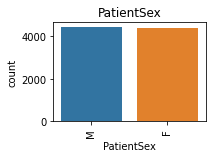

In [25]:
plt.subplot(2,2,1)
plotFrequencyTable(patient_frame,'PatientSex')

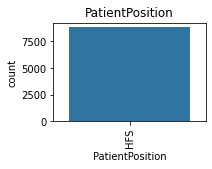

In [26]:
plt.subplot(2,2,1)
plotFrequencyTable(patient_frame,'PatientPosition')

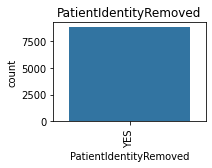

In [27]:
plt.subplot(2,2,1)
plotFrequencyTable(patient_frame,'PatientIdentityRemoved')

In [28]:
# # ADD rows and columns for image size
# frame['Image_Size'] = frame['Rows']*frame['Columns']
# frame['Slice_Location']=frame.get('SliceLocation', '(missing)')